In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('FinalData.csv')

In [5]:
df.head()

,Unnamed: 0,Name,ABV,AverageRating,RatingCount,BeerStyle,BreweryType,City,State,Country,has_twitter,has_facebook,SocialMedia
0,0,Närke Kaggen Stormaktsporter,9.500000,4.489771,557.0,Imperial Stout,Microbrewery,Örebro,NaN,Sweden,0,0,0
1,1,Westvleteren 12 (XII),10.200000,4.426578,3332.0,Abt/Quadrupel,Microbrewery,Westvleteren,NaN,Belgium,0,0,0
2,2,Schramm’s The Heart of Darkness,14.000000,4.423655,77.0,Mead,Meadery,Ferndale,Michigan,United States,1,1,1
3,3,B. Nektar Ken Schramm Signature Series - The H...,14.000000,4.421873,50.0,Mead,Meadery,Ferndale,Michigan,United States,1,1,1
4,4,Cigar City Pilot Series Dragonfruit Passion Fr...,3.979168,4.420719,46.0,Berliner Weisse,Microbrewery,Tampa,Florida,United States,1,1,1


In [6]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [7]:
#Get beers from the top 15 countries
total_beers = df.groupby('Country').Country.count()
total_beers1 = dict(total_beers.sort_values(ascending=False).head(15))
countries = list(total_beers1.keys())
top_15 = pd.DataFrame()
for c in countries:
    top_15 = top_15.append(df[df.Country == c])


In [9]:
data = top_15

In [10]:
data = data.drop(['BeerStyle','BreweryType','City','State','Name','has_twitter','has_facebook'], axis=1)

In [14]:
f1 = data.ABV.values
f2 = data.AverageRating.values
f3 = data.RatingCount.values
f4 = data.SocialMedia.values
X = np.array(list(zip(f1,f2,f3,f4)))

In [16]:
from sklearn.cluster import KMeans

In [17]:
model = KMeans(n_clusters=15)

In [18]:
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=15, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [19]:
labels = model.predict(X)

In [21]:
abv = X[:,0]
avgrating = X[:,1]
ratcount = X[:,2]

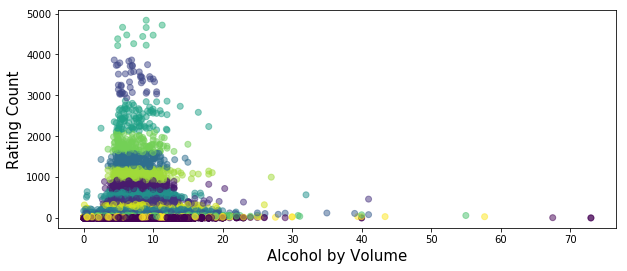

In [25]:
plt.figure(figsize=(10,4))
plt.scatter(abv,ratcount,c=labels,alpha=0.5)
plt.xlabel('Alcohol by Volume', size=15)
plt.ylabel('Rating Count',size=15)
plt.show()

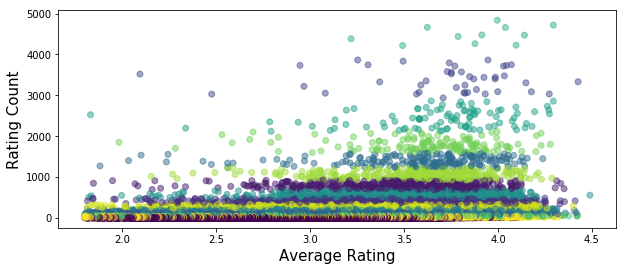

In [26]:
plt.figure(figsize=(10,4))
plt.scatter(avgrating,ratcount,c=labels,alpha=0.5)
plt.xlabel('Average Rating', size=15)
plt.ylabel('Rating Count',size=15)
plt.show()

In [27]:
print (model.inertia_)

34373900.3906


The inertia is too high, which indicates that the labels are spread wide apart. We will do an inertia plot with different clusters.

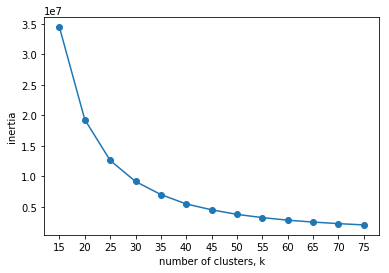

In [28]:
#run K-means with different number of clusters to get the inertia plot
ks = [15,20,25,30,35,40,45,50,55,60,65,70,75]
inertias =[]

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(X)
    inertias.append(model.inertia_)
    
plt.plot(ks,inertias,'-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [29]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [30]:
countries = data.Country.values